In [1]:
from functools import partial
from __future__ import division
import math

In [2]:
# VECTORS

In [3]:
def vector_add(v, w):
    return [v_i + w_i
           for v_i, w_i in zip(v, w)]

vector_add([1,2], [2,1])

[3, 3]

In [4]:
def vector_subtract(v, w):
    return [v_i - w_i
           for v_i, w_i in zip(v, w)]

vector_subtract([3, 3], [1,3])

[2, 0]

In [5]:
vectors_sum = partial(reduce, vector_add)

vectors_sum([[3, 3], [1,3]])

[4, 6]

In [6]:
def scalar_multiply(c, v):
    return [c * v_i 
           for v_i in v]

scalar_multiply(3, [1, 3])

[3, 9]

In [7]:
def vectors_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n,
                          vectors_sum(vectors))

vectors_mean([[3, 2], [1,3]])

[2.0, 2.5]

In [8]:
def dot (v, w):
    return sum(v_i * w_i 
               for v_i, w_i in zip(v, w))

dot([2,3], [4,-1])

5

In [9]:
def sum_of_squares(v):
    return dot(v,v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))


magnitude([3, 4])

5.0

In [10]:
def distance(v, w):
    return magnitude(vector_subtract(v, w))

distance([0, 0], [3, 4])

5.0

In [11]:
# MATRIX

In [12]:
def shape(A):
    rows = len(A)
    cols = len(A[0]) if A else 0
    return rows, cols

shape([[],[]])

(2, 0)

In [13]:
def get_row(A, i):
    return A[i]

def get_col(A, j):
    return [row[j] 
            for row in A]

A = [[1, 2],
     [3, 4],
     [5, 6]]

print(get_row(A, 1))
print(get_col(A, 0))

[3, 4]
[1, 3, 5]


In [14]:
def make_matrix(rows, cols, func):
    return [
        [func(i, j)
        for j in range(cols)]
        for i in range(rows)
    ]

make_matrix(5, 3, lambda i, j: 1 if i==j else 0)

[[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 0], [0, 0, 0]]

In [15]:
# STATISTICS

In [16]:
# prepare data
import random
num_friends = [random.randrange(54) for _ in range(199)]
num_friends.append(100)

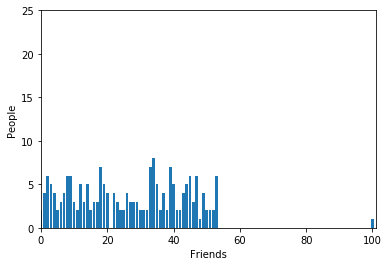

In [17]:
# display data
from collections import Counter
import matplotlib.pyplot as plt

friends_count = Counter(num_friends)
xs = range(101)
ys = [friends_count[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.xlabel("Friends")
plt.ylabel("People")
plt.show()

In [18]:
def mean(x):
    return sum(x)/len(x)

mean(num_friends)

26.58

In [19]:
def median(x):
    l = len(x)
    sorted_x = sorted(x)
    if l % 2 == 1:
        return sorted_x[l//2]
    
    return mean([sorted_x[l//2], sorted_x[l//2 - 1]])

median(num_friends)

27.0

In [20]:
def quantille(x, p): 
    index = int(len(x)*p)
    return sorted(x)[index]

print quantille(num_friends, 0.25)
print quantille(num_friends, 0.5)
print quantille(num_friends, 0.75)

12
27
40


In [21]:
from collections import Counter

def mode(x):
    counter = Counter(num_friends)
    max_count = max(counter.values())
    print max_count
    return ([x_i for x_i, count in counter.iteritems()
           if count == max_count], max_count)

mode(num_friends)

8


([34], 8)

In [24]:
# dispersion
def de_mean(x):
    bar = mean(x)
    return[x_i - bar
          for x_i in x]

def variance(x):
    n=len(x)
    deviations=de_mean(x)
    return sum_of_squares(deviations)/(n-1)

def standard_deviation(x):
    return math.sqrt(variance(x))

print variance(num_friends)
print standard_deviation(num_friends)

274.968442211
16.5821724213


In [23]:
# covariation
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y))/(n - 1)

def correlation(x, y):
    std_x = standard_deviation(x)
    std_y = standard_deviation(y)
    if std_x > 0 and std_y > 0:
        return covariance(x,y)/std_x/std_y
    return 0

274.9684422110553